In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
from plotly.subplots import make_subplots

In [2]:
# Loading the dataframe 
# Indoor Data 
df=pd.read_csv("Dataset/Mean_of_all_resedential_avg_date.csv")

In [3]:
df.shape

(31, 4)

In [4]:
df.describe()

mean_pm10   mean_pm25    mean_aqi
count   31.000000   31.000000   31.000000
mean   205.392635   72.149605  178.724505
std     49.982151   15.494828   39.037705
min     95.859375   36.387153   93.090278
25%    179.388889   61.809028  156.963542
50%    215.192708   72.432292  183.178819
75%    242.127604   79.903067  204.773437
max    282.399306  110.808780  249.543403

In [5]:
# Loading the dataframe 
# Outdoor Data
df1=pd.read_csv("Dataset/Mean_of_all_cpcb_avg_date.csv")

In [6]:
df1.shape

(31, 4)

In [33]:
df1.describe()

mean_pm2.5   mean_pm10    mean_aqi
count   31.000000   31.000000   31.000000
mean    65.526996  252.323360  227.053218
std     25.913503   45.114667   44.364626
min     33.058749  150.394789  134.616755
25%     45.517598  229.664090  203.857755
50%     60.572917  252.983575  231.180515
75%     81.758241  284.168804  248.263108
max    137.419271  363.764757  349.358681

## Indoor & Outdoor Comaprison  Mean Aqi

In [34]:
# Define bar properties accordingly 
bins = [0, 50, 100, 200, 300, 400, 500]
labels = ['Good', 'Satisfactory', 'Moderately Polluted', 'Poor', 'Very Poor', 'Severe']
colors = {
    'Good': 'lightgreen',
    'Satisfactory': 'green',
    'Moderately Polluted': 'orange',
    'Poor': 'red',
    'Very Poor': 'darkred',
    'Severe': 'brown'
}
# Function to process the data
def process_data(df, date_col, aqi_col):
    return pd.DataFrame({
        'y': df[aqi_col],
        'x': pd.to_datetime(df[date_col], format='%d-%m-%Y'),
        'label': pd.cut(df[aqi_col], bins=bins, labels=labels)
    }).sort_values(by='x')
# Function to create bar traces
def create_traces(df):
    return [go.Bar(x=np.array(label_df['x']), y=np.array(label_df['y']), name=label, marker={'color': colors[label]})
            for label, label_df in df.groupby('label', observed=False)]

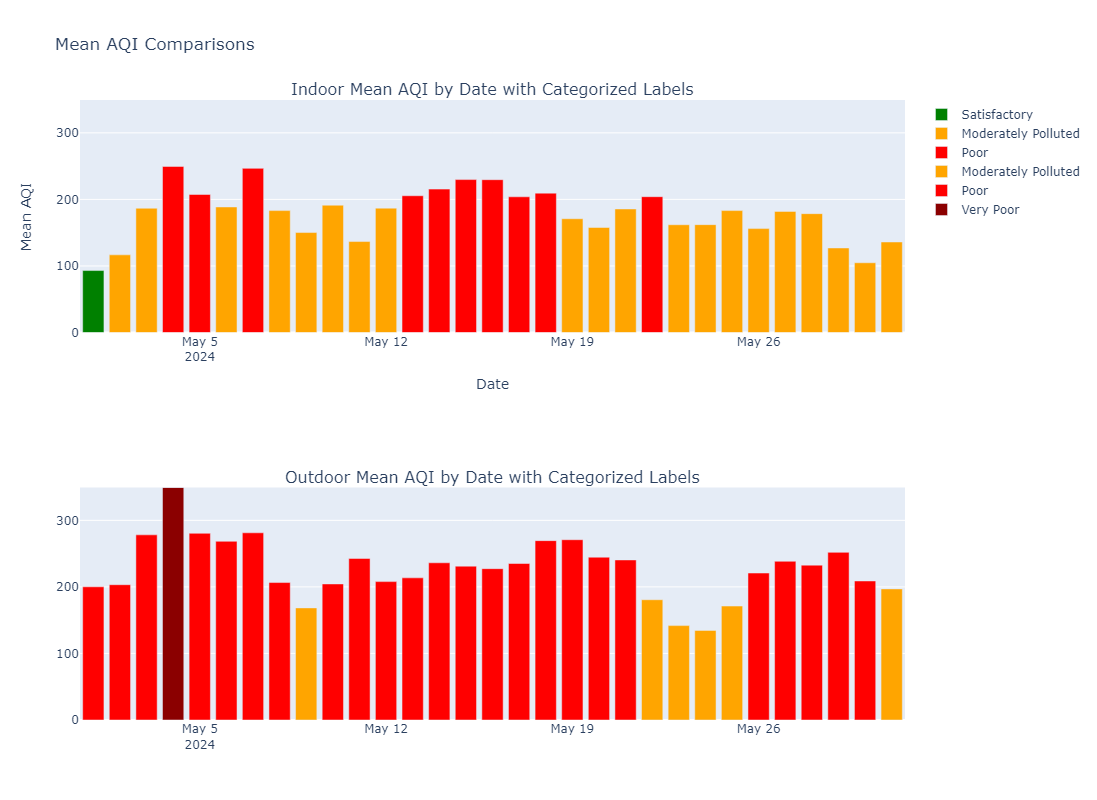

In [35]:
# Process data and create traces
bars_indoor = create_traces(process_data(df, 'Date', 'mean_aqi'))
bars_outdoor = create_traces(process_data(df1, 'date', 'mean_aqi'))

# Calculate max y value for y-axis range
max_y_value = max(df['mean_aqi'].max(), df1['mean_aqi'].max())

# Create subplots and add traces
fig = make_subplots(rows=2, cols=1, subplot_titles=['Indoor Mean AQI by Date with Categorized Labels', 'Outdoor Mean AQI by Date with Categorized Labels'])
for bar in bars_indoor: fig.add_trace(bar, row=1, col=1)
for bar in bars_outdoor: fig.add_trace(bar, row=2, col=1)

# Update layout and display figure
fig.update_layout(
    title='Mean AQI Comparisons',
    height=800,
    xaxis_title='Date',
    yaxis_title='Mean AQI'
)
fig.update_yaxes(range=[0, max_y_value], row=1, col=1)
fig.update_yaxes(range=[0, max_y_value], row=2, col=1)
fig.show()

In [36]:
# Define bar properties accordingly
bins = [0, 30, 60, 90, 120, 250, float('inf')]
labels = ['Good', 'Satisfactory', 'Moderately Polluted', 'Poor', 'Very Poor', 'Severe']
colors = {
    'Good': 'lightgreen',
    'Satisfactory': 'green',
    'Moderately Polluted': 'orange',
    'Poor': 'red',
    'Very Poor': 'darkred',
    'Severe': 'brown'
}
# Function to process the data
def process_data(df, date_col, aqi_col):
    return pd.DataFrame({
        'y': df[aqi_col],
        'x': pd.to_datetime(df[date_col], format='%d-%m-%Y'),
        'label': pd.cut(df[aqi_col], bins=bins, labels=labels)
    }).sort_values(by='x')
# Function to create bar traces
def create_traces(df):
    return [go.Bar(x=np.array(label_df['x']), y=np.array(label_df['y']), name=label, marker={'color': colors[label]})
            for label, label_df in df.groupby('label', observed=False)]

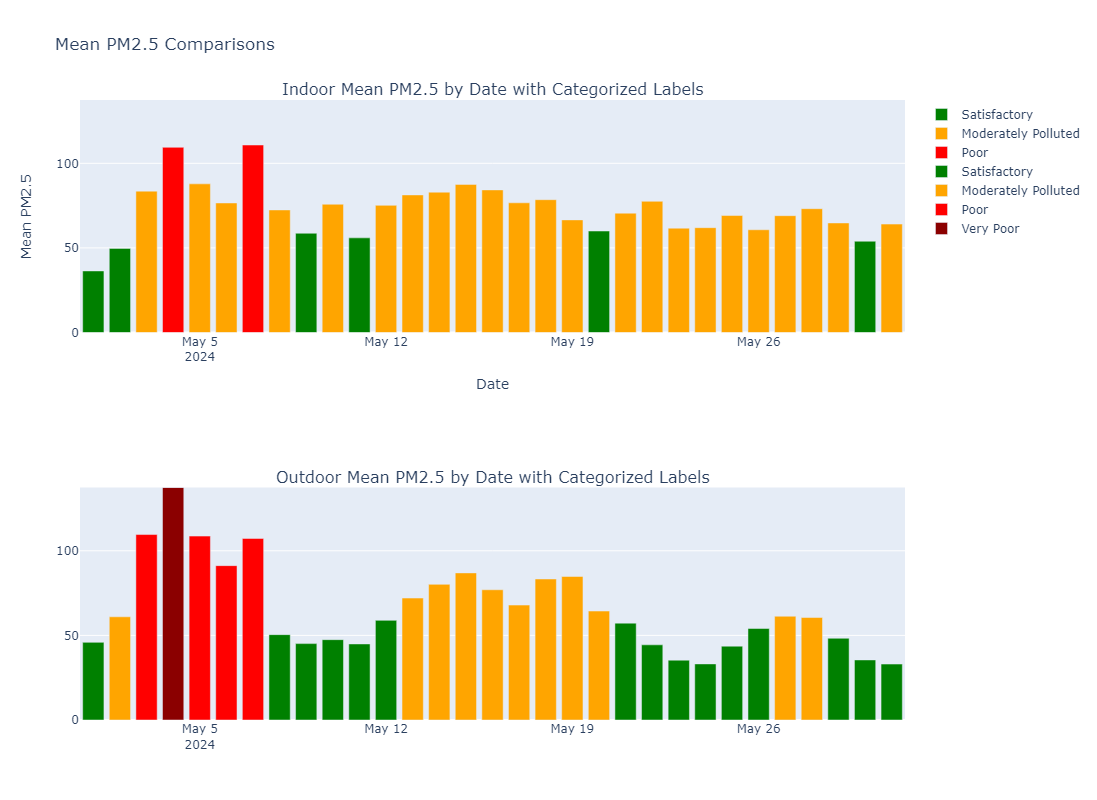

In [37]:
# Process data and create traces
bars_indoor = create_traces(process_data(df, 'Date', 'mean_pm25'))
bars_outdoor = create_traces(process_data(df1, 'date', 'mean_pm2.5'))

# Calculate max y value for y-axis range
max_y_value = max(df['mean_pm25'].max(), df1['mean_pm2.5'].max())

# Create subplots and add traces
fig = make_subplots(rows=2, cols=1, subplot_titles=['Indoor Mean PM2.5 by Date with Categorized Labels', 'Outdoor Mean PM2.5 by Date with Categorized Labels'])
for bar in bars_indoor: fig.add_trace(bar, row=1, col=1)
for bar in bars_outdoor: fig.add_trace(bar, row=2, col=1)
# Update layout and display figure
fig.update_layout(
    title='Mean PM2.5 Comparisons',
    height=800,
    xaxis_title='Date',
    yaxis_title='Mean PM2.5'
)
fig.update_yaxes(range=[0, max_y_value], row=1, col=1)
fig.update_yaxes(range=[0, max_y_value], row=2, col=1)
fig.show()

In [38]:
# Define bar properties and configurations
bins = [0, 50, 100, 250, 350, 430, float('inf')]
labels = ['Good', 'Satisfactory', 'Moderately Polluted', 'Poor', 'Very Poor', 'Severe']
colors = {
    'Good': 'lightgreen',
    'Satisfactory': 'green',
    'Moderately Polluted': 'orange',
    'Poor': 'red',
    'Very Poor': 'darkred',
    'Severe': 'brown'
}
# Function to process the data
def process_data(df, date_col, aqi_col):
    return pd.DataFrame({
        'y': df[aqi_col],
        'x': pd.to_datetime(df[date_col], format='%d-%m-%Y'),
        'label': pd.cut(df[aqi_col], bins=bins, labels=labels)
    }).sort_values(by='x')
# Function to create bar traces
def create_traces(df):
    return [go.Bar(x=np.array(label_df['x']), y=np.array(label_df['y']), name=label, marker={'color': colors[label]})
            for label, label_df in df.groupby('label', observed=False)]

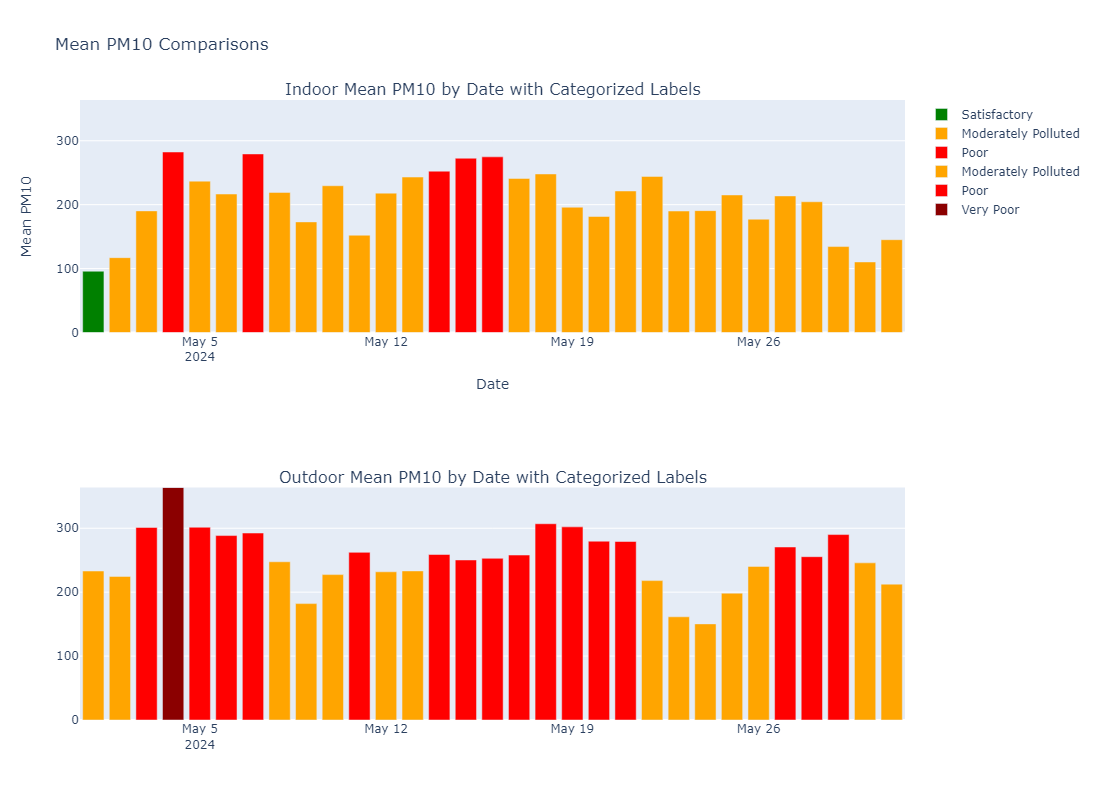

In [39]:
# Process data and create traces
bars_indoor = create_traces(process_data(df, 'Date', 'mean_pm10'))
bars_outdoor = create_traces(process_data(df1, 'date', 'mean_pm10'))

# Calculate maximum y value for y-axis range
max_y_value = max(df['mean_pm10'].max(), df1['mean_pm10'].max())

# Create subplots and add traces
fig = make_subplots(rows=2, cols=1, subplot_titles=['Indoor Mean PM10 by Date with Categorized Labels', 'Outdoor Mean PM10 by Date with Categorized Labels'])
for bar in bars_indoor: fig.add_trace(bar, row=1, col=1)
for bar in bars_outdoor: fig.add_trace(bar, row=2, col=1)
# Update layout and display figure
fig.update_layout(
    title='Mean PM10 Comparisons',
    height=800,
    xaxis_title='Date',
    yaxis_title='Mean PM10'
)
fig.update_yaxes(range=[0, max_y_value], row=1, col=1)
fig.update_yaxes(range=[0, max_y_value], row=2, col=1)
fig.show()

C:\ProgramData\anaconda3\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




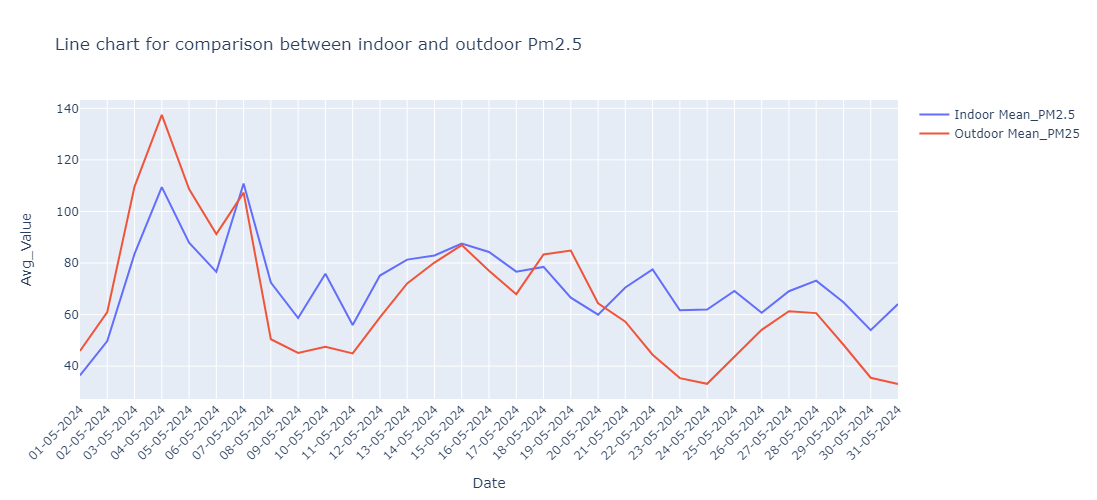

In [7]:
fig = go.Figure()
fig.add_trace(go.Line(
    x=df['Date'],
    y=df['mean_pm25'],
    name='Indoor Mean_PM2.5',
))
fig.add_trace(go.Line(
    x=df1['date'],
    y=df1['mean_pm2.5'],
    name='Outdoor Mean_PM25',
))
# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45,width=1100,  # Adjust the width as needed
    height=500, title='Line chart for comparison between indoor and outdoor Pm2.5',  xaxis_title='Date',  # Add x-axis label
    yaxis_title='Avg_Value')
fig.show()

In [10]:
tf=pd.read_csv("Dataset/All living Room Residential Data 15min interval.csv")

In [56]:
tf.shape

(2976, 19)

In [57]:
tf.isnull().sum()

CreatedDate                           0
pm25_Piyush: Living room            348
pm10_Piyush: Living room            348
aqi_Piyush: Living room             348
pm25_Robin: Living room               0
pm10_Robin: Living room               0
aqi_Robin: Living room                0
pm25_Mariyam_LR1                      0
pm10_Mariyam_LR1                      0
aqi_Mariyam_LR1                       0
pm25_Abhishek Jain: Living room       0
pm10_Abhishek Jain: Living room       0
aqi_Abhishek Jain: Living room        0
pm25_Lakshmi K: Living room           0
pm10_Lakshmi K: Living room           0
aqi_Lakshmi K: Living room            0
pm25_Surender: Living room           15
pm10_Surender: Living room           15
aqi_Surender: Living room            15
dtype: int64

In [58]:
tf.dropna()

CreatedDate  pm25_Piyush: Living room   pm10_Piyush: Living room   \
0     01-05-2024 00:00                       33.0                       89.0   
1     01-05-2024 00:15                       32.0                       85.0   
2     01-05-2024 00:30                       32.0                       85.0   
3     01-05-2024 00:45                       32.0                       84.0   
4     01-05-2024 01:00                       31.0                       83.0   
...                ...                        ...                        ...   
2971  31-05-2024 22:45                       89.0                      223.0   
2972  31-05-2024 23:00                       85.0                      209.0   
2973  31-05-2024 23:15                       80.0                      191.0   
2974  31-05-2024 23:30                       76.0                      176.0   
2975  31-05-2024 23:45                       73.0                      167.0   

      aqi_Piyush: Living room   pm25_Robin: Living room  \
0                         89.0                       38   
1                         85.0                       38   
2                         85.0                       38   
3                         84.0                       38   
4                         83.0                       38   
...                        ...                      ...   
2971                     197.0                      131   
2972                     183.0                      128   
2973                     167.0                      121   
2974                     153.0                      114   
2975                     145.0                      108   

      pm10_Robin: Living room  aqi_Robin: Living room  pm25_Mariyam_LR1  \
0                         100                     100                32   
1                          99                      99                32   
2                          99                      99                31   
3                         100                     100                31   
4                         100                     100                39   
...                       ...                     ...               ...   
2971                      325                     308               129   
2972                      321                     306               126   
2973                      307                     301               125   
2974                      291                     280               123   
2975                      271                     260               122   

      pm10_Mariyam_LR1  aqi_Mariyam_LR1  pm25_Abhishek Jain: Living room   \
0                   87               87                                37   
1                   87               87                                37   
2                   86               86                                37   
3                   85               85                                37   
4                  110              107                                35   
...                ...              ...                               ...   
2971               320              307                                55   
2972               312              305                                56   
2973               311              304                                56   
2974               306              302                                56   
2975               304              302                                56   

      pm10_Abhishek Jain: Living room   aqi_Abhishek Jain: Living room   \
0                                  102                              101   
1                                  103                              102   
2                                  103                              102   
3                                  102                              101   
4                                   96                               96   
...                                ...                           

In [59]:
tf.head()

CreatedDate  pm25_Piyush: Living room   pm10_Piyush: Living room   \
0  01-05-2024 00:00                       33.0                       89.0   
1  01-05-2024 00:15                       32.0                       85.0   
2  01-05-2024 00:30                       32.0                       85.0   
3  01-05-2024 00:45                       32.0                       84.0   
4  01-05-2024 01:00                       31.0                       83.0   

   aqi_Piyush: Living room   pm25_Robin: Living room  pm10_Robin: Living room  \
0                      89.0                       38                      100   
1                      85.0                       38                       99   
2                      85.0                       38                       99   
3                      84.0                       38                      100   
4                      83.0                       38                      100   

   aqi_Robin: Living room  pm25_Mariyam_LR1  pm10_Mariyam_LR1  \
0                     100                32                87   
1                      99                32                87   
2                      99                31                86   
3                     100                31                85   
4                     100                39               110   

   aqi_Mariyam_LR1  pm25_Abhishek Jain: Living room   \
0               87                                37   
1               87                                37   
2               86                                37   
3               85                                37   
4              107                                35   

   pm10_Abhishek Jain: Living room   aqi_Abhishek Jain: Living room   \
0                               102                              101   
1                               103                              102   
2                               103                              102   
3                               102                              101   
4                                96                               96   

   pm25_Lakshmi K: Living room  pm10_Lakshmi K: Living room  \
0                           55                          151   
1                           59                          156   
2                           62                          159   
3                           60                          158   
4                           55                          152   

   aqi_Lakshmi K: Living room  pm25_Surender: Living room  \
0                         134                        61.0   
1                         137                        60.0   
2                         139                        62.0   
3                         139                        60.0   
4                         135                        57.0   

   pm10_Surender: Living room  aqi_Surender: Living room  
0                       153.0                      135.0  
1                       152.0                      135.0  
2                       154.0                      136.0  
3                       153.0                      135.0  
4                       148.0                      132.0

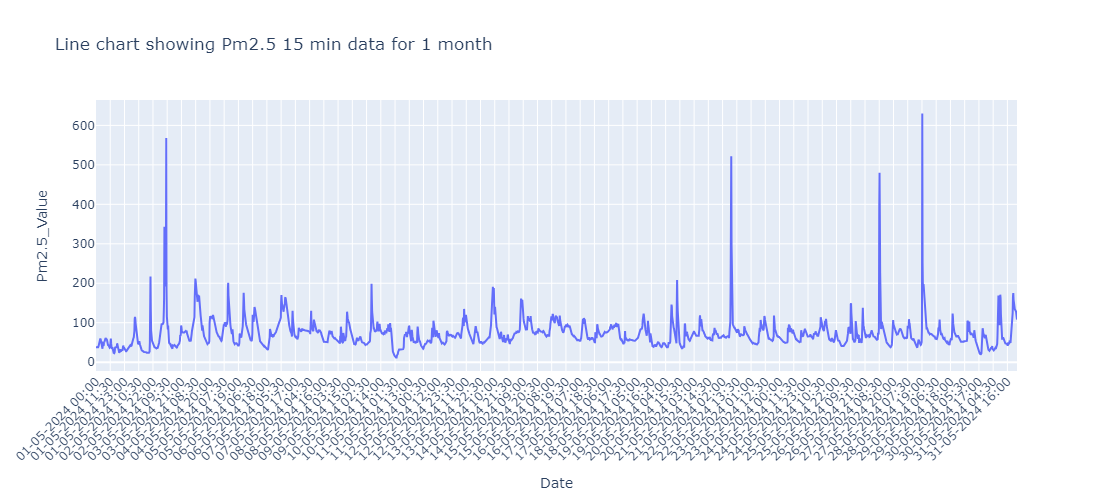

In [12]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Line(
    x=tf['CreatedDate'],
    y=tf['pm25_Robin: Living room'],
    name='Robin_PM25',
   # marker_color='indianred',
))
#fig.add_trace(go.Line(
 #   x=tf['CreatedDate'],
  #  y=tf['pm25_Mariyam_LR1'],
   # name='Mariyam_PM25',
   # marker_color='lightsalmon'
#))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45,width=1100,  # Adjust the width as needed
    height=500, title='Line chart showing Pm2.5 15 min data for 1 month', xaxis_title='Date',  # Add x-axis label
    yaxis_title='Pm2.5_Value')
fig.show()

### This scripit directly calculate the mean value for each day and plot a line chart.(15 min interval)

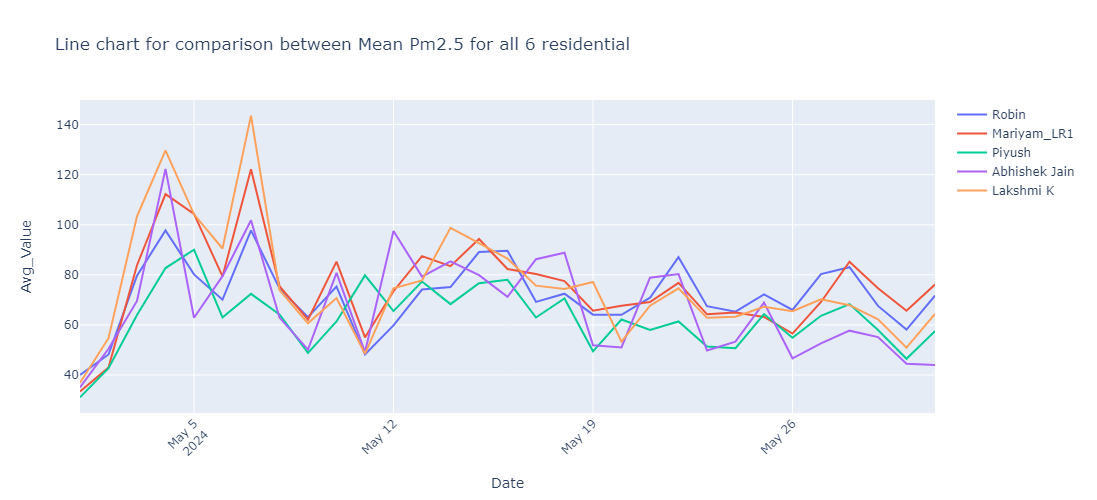

In [13]:
tf['CreatedDate'] = pd.to_datetime(tf['CreatedDate'], format="%d-%m-%Y %H:%M")
tf['Date'] = tf['CreatedDate'].dt.date

# Group by "date" and calculate the "mean" for each PM source
new_dataframe = pd.concat([
    tf.groupby('Date')[col].mean().reset_index() for col in [
        'pm25_Robin: Living room',
        'pm25_Mariyam_LR1',
        'pm25_Piyush: Living room ',
        'pm25_Abhishek Jain: Living room ',
        'pm25_Lakshmi K: Living room'
    ]
], axis=1)

# Remove duplicate columns
new_dataframe = new_dataframe.loc[:, ~new_dataframe.columns.duplicated()]

# Plot the line chart
fig = go.Figure()

for col in new_dataframe.columns[1:]:
    fig.add_trace(go.Scatter(
        x=new_dataframe['Date'],
        y=new_dataframe[col],
        name=col.replace('pm25_', '').replace(': Living room', ''),
        mode='lines'
    ))

# Update layout
fig.update_layout(
    xaxis_tickangle=-45,
    width=1100,
    height=500,
    title='Line chart for comparison between Mean Pm2.5 for all 6 residential',
    xaxis_title='Date',
    yaxis_title='Avg_Value'
)

fig.show()

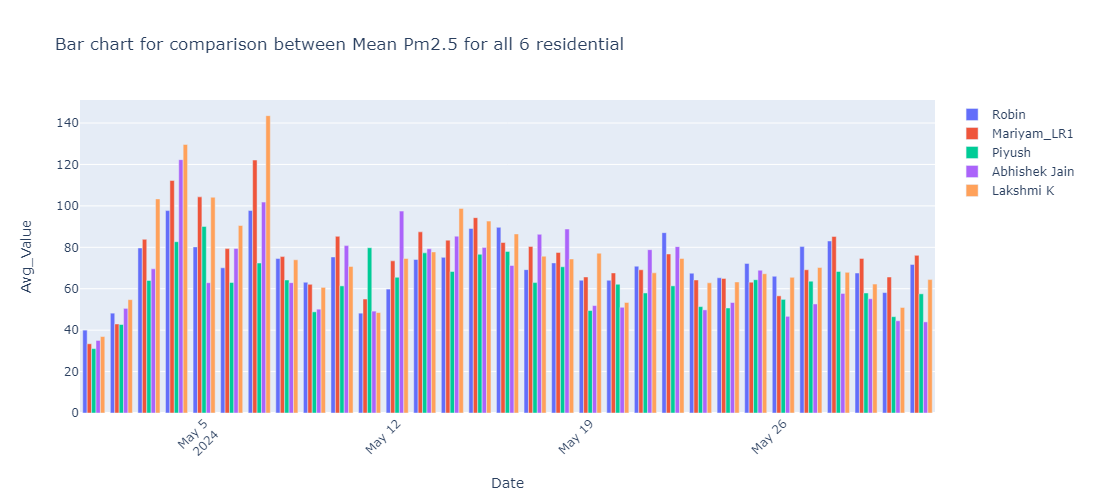

In [15]:
tf['CreatedDate'] = pd.to_datetime(tf['CreatedDate'], format="%d-%m-%Y %H:%M")
tf['Date'] = tf['CreatedDate'].dt.date

# Group by "date" and calculate the "mean" for each PM source
new_dataframe = pd.concat([
    tf.groupby('Date')[col].mean().reset_index() for col in [
        'pm25_Robin: Living room',
        'pm25_Mariyam_LR1',
        'pm25_Piyush: Living room ',
        'pm25_Abhishek Jain: Living room ',
        'pm25_Lakshmi K: Living room'
    ]
], axis=1)

# Remove duplicate columns
new_dataframe = new_dataframe.loc[:, ~new_dataframe.columns.duplicated()]

# Plot the line chart
fig = go.Figure()

for col in new_dataframe.columns[1:]:
    fig.add_trace(go.Bar(
        x=new_dataframe['Date'],
        y=new_dataframe[col],
        name=col.replace('pm25_', '').replace(': Living room', '')
    ))

# Update layout
fig.update_layout(
    xaxis_tickangle=-45,
    width=1100,
    height=500,
    title='Bar chart for comparison between Mean Pm2.5 for all 6 residential',
    xaxis_title='Date',
    yaxis_title='Avg_Value'
)

fig.show()

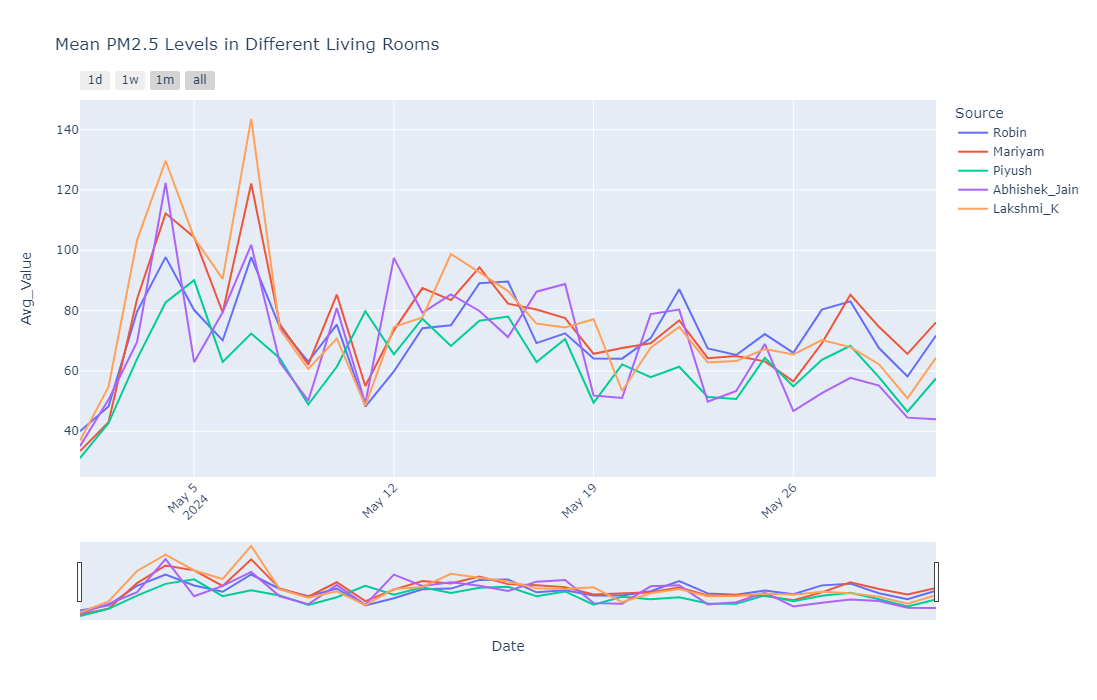

In [16]:
tf['Date'] = pd.to_datetime(tf['CreatedDate'], format="%d-%m-%Y %H:%M").dt.date

# Define PM sources
pm_sources = [
    'pm25_Robin: Living room',
    'pm25_Mariyam_LR1',
    'pm25_Piyush: Living room ',
    'pm25_Abhishek Jain: Living room ',
    'pm25_Lakshmi K: Living room'
]

# Group by date and calculate mean, then rename columns
new_dataframe = tf.groupby('Date')[pm_sources].mean().reset_index()
new_dataframe.columns = ['Date'] + [col.split('_')[1].split(':')[0].replace(' ', '_') for col in pm_sources]

# Melt dataframe for plotly express making dataset long
df_melted = new_dataframe.melt(id_vars=['Date'], var_name='Source', value_name='Avg_Value')

# Plot the line chart with range slider and selectors
fig = px.line(df_melted, x='Date', y='Avg_Value', color='Source', title='Mean PM2.5 Levels in Different Living Rooms')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=[
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(step="all")
        ]
    )
)

fig.update_layout(
    xaxis_tickangle=-45,
    width=1100,
    height=700,
    xaxis_title='Date',
    yaxis_title='Avg_Value'
)

fig.show()
